In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# DATA SET 7

In [2]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2007.csv")
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2007-12-01 01:00:00,NaN,2.86,NaN,NaN,NaN,282.200012,1054.000000,NaN,4.030000,156.199997,97.43,NaN,64.519997,NaN,NaN,28079001
1,2007-12-01 01:00:00,NaN,1.82,NaN,NaN,NaN,86.419998,354.600006,NaN,3.260000,80.809998,NaN,NaN,35.419998,NaN,NaN,28079003
2,2007-12-01 01:00:00,NaN,1.47,NaN,NaN,NaN,94.639999,319.000000,NaN,5.310000,53.099998,NaN,NaN,19.080000,NaN,NaN,28079004
3,2007-12-01 01:00:00,NaN,1.64,NaN,NaN,NaN,127.900002,476.700012,NaN,4.500000,105.300003,NaN,NaN,17.670000,NaN,NaN,28079039
4,2007-12-01 01:00:00,4.64,1.86,4.26,7.98,0.57,145.100006,573.900024,3.49,52.689999,106.500000,15.90,3.56,40.230000,1.94,21.200001,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225115,2007-03-01 00:00:00,0.30,0.45,1.00,0.30,0.26,8.690000,11.690000,1.00,42.209999,6.760000,5.14,1.00,7.420000,1.44,0.510000,28079024
225116,2007-03-01 00:00:00,NaN,0.16,NaN,NaN,NaN,46.820000,51.480000,NaN,22.150000,5.700000,NaN,NaN,7.130000,NaN,NaN,28079025
225117,2007-03-01 00:00:00,0.24,NaN,0.20,NaN,0.09,51.259998,66.809998,NaN,18.540001,13.010000,6.95,NaN,8.740000,1.30,0.490000,28079026
225118,2007-03-01 00:00:00,0.11,NaN,1.00,NaN,0.05,24.240000,36.930000,NaN,NaN,6.610000,NaN,NaN,9.890000,1.29,0.680000,28079027


In [3]:
b=a.fillna(value=10)
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2007-12-01 01:00:00,10.00,2.86,10.00,10.00,10.00,282.200012,1054.000000,10.00,4.030000,156.199997,97.43,10.00,64.519997,10.00,10.000000,28079001
1,2007-12-01 01:00:00,10.00,1.82,10.00,10.00,10.00,86.419998,354.600006,10.00,3.260000,80.809998,10.00,10.00,35.419998,10.00,10.000000,28079003
2,2007-12-01 01:00:00,10.00,1.47,10.00,10.00,10.00,94.639999,319.000000,10.00,5.310000,53.099998,10.00,10.00,19.080000,10.00,10.000000,28079004
3,2007-12-01 01:00:00,10.00,1.64,10.00,10.00,10.00,127.900002,476.700012,10.00,4.500000,105.300003,10.00,10.00,17.670000,10.00,10.000000,28079039
4,2007-12-01 01:00:00,4.64,1.86,4.26,7.98,0.57,145.100006,573.900024,3.49,52.689999,106.500000,15.90,3.56,40.230000,1.94,21.200001,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225115,2007-03-01 00:00:00,0.30,0.45,1.00,0.30,0.26,8.690000,11.690000,1.00,42.209999,6.760000,5.14,1.00,7.420000,1.44,0.510000,28079024
225116,2007-03-01 00:00:00,10.00,0.16,10.00,10.00,10.00,46.820000,51.480000,10.00,22.150000,5.700000,10.00,10.00,7.130000,10.00,10.000000,28079025
225117,2007-03-01 00:00:00,0.24,10.00,0.20,10.00,0.09,51.259998,66.809998,10.00,18.540001,13.010000,6.95,10.00,8.740000,1.30,0.490000,28079026
225118,2007-03-01 00:00:00,0.11,10.00,1.00,10.00,0.05,24.240000,36.930000,10.00,10.000000,6.610000,10.00,10.00,9.890000,1.29,0.680000,28079027


In [4]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225120 entries, 0 to 225119
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     225120 non-null  object 
 1   BEN      225120 non-null  float64
 2   CO       225120 non-null  float64
 3   EBE      225120 non-null  float64
 4   MXY      225120 non-null  float64
 5   NMHC     225120 non-null  float64
 6   NO_2     225120 non-null  float64
 7   NOx      225120 non-null  float64
 8   OXY      225120 non-null  float64
 9   O_3      225120 non-null  float64
 10  PM10     225120 non-null  float64
 11  PM25     225120 non-null  float64
 12  PXY      225120 non-null  float64
 13  SO_2     225120 non-null  float64
 14  TCH      225120 non-null  float64
 15  TOL      225120 non-null  float64
 16  station  225120 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 29.2+ MB


In [5]:
b.describe()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
count,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,225120.000000,2.251200e+05
mean,7.223153,1.272733,7.360829,9.117941,6.228041,59.772070,110.951854,8.988908,33.013093,32.881850,12.264267,8.975508,10.930962,6.687413,8.426663,2.807902e+07
std,4.240314,2.628506,4.071097,2.616280,4.758791,38.072573,111.752232,2.821556,25.687389,27.358971,8.031580,2.852969,8.288712,4.174736,4.447272,1.904376e+01
min,0.100000,0.000000,0.100000,0.150000,0.000000,1.050000,1.780000,0.110000,0.010000,0.670000,0.380000,0.110000,0.100000,0.210000,0.100000,2.807900e+07
25%,1.520000,0.280000,1.820000,10.000000,0.250000,32.119999,41.090000,10.000000,10.000000,14.190000,10.000000,10.000000,6.410000,1.430000,7.220000,2.807901e+07
50%,10.000000,0.420000,10.000000,10.000000,10.000000,53.470001,79.000000,10.000000,27.129999,25.620001,10.000000,10.000000,8.520000,10.000000,10.000000,2.807902e+07
75%,10.000000,0.710000,10.000000,10.000000,10.000000,79.470001,142.399994,10.000000,50.910000,42.980000,10.000000,10.000000,12.220000,10.000000,10.000000,2.807903e+07
max,30.139999,10.000000,84.279999,65.480003,10.000000,628.599976,2300.000000,32.540001,159.199997,572.099976,206.899994,32.180000,148.199997,10.000000,164.100006,2.807910e+07


In [6]:
c=b.head(100)
c

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2007-12-01 01:00:00,10.00,2.86,10.00,10.00,10.00,282.200012,1054.000000,10.00,4.030000,156.199997,97.430000,10.00,64.519997,10.00,10.000000,28079001
1,2007-12-01 01:00:00,10.00,1.82,10.00,10.00,10.00,86.419998,354.600006,10.00,3.260000,80.809998,10.000000,10.00,35.419998,10.00,10.000000,28079003
2,2007-12-01 01:00:00,10.00,1.47,10.00,10.00,10.00,94.639999,319.000000,10.00,5.310000,53.099998,10.000000,10.00,19.080000,10.00,10.000000,28079004
3,2007-12-01 01:00:00,10.00,1.64,10.00,10.00,10.00,127.900002,476.700012,10.00,4.500000,105.300003,10.000000,10.00,17.670000,10.00,10.000000,28079039
4,2007-12-01 01:00:00,4.64,1.86,4.26,7.98,0.57,145.100006,573.900024,3.49,52.689999,106.500000,15.900000,3.56,40.230000,1.94,21.200001,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2007-12-01 04:00:00,10.00,1.08,10.00,10.00,10.00,88.559998,312.200012,10.00,0.530000,65.180000,10.000000,10.00,13.870000,10.00,10.000000,28079036
96,2007-12-01 04:00:00,10.00,0.87,10.00,10.00,10.00,89.129997,236.000000,10.00,5.880000,41.369999,10.000000,10.00,13.830000,10.00,10.000000,28079021
97,2007-12-01 04:00:00,10.00,0.92,10.00,10.00,10.00,85.779999,236.399994,10.00,9.710000,45.580002,22.610001,10.00,13.010000,10.00,10.000000,28079022
98,2007-12-01 04:00:00,0.52,0.56,0.88,10.00,0.33,69.989998,155.800003,10.00,2.430000,14.170000,10.000000,10.00,8.050000,1.53,3.440000,28079023


In [7]:
c.columns

Index(['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [8]:
d=c[['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']]
d

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,10.00,2.86,10.00,10.00,10.00,282.200012,1054.000000,10.00,4.030000,156.199997,10.00,64.519997,10.00,10.000000,28079001
1,10.00,1.82,10.00,10.00,10.00,86.419998,354.600006,10.00,3.260000,80.809998,10.00,35.419998,10.00,10.000000,28079003
2,10.00,1.47,10.00,10.00,10.00,94.639999,319.000000,10.00,5.310000,53.099998,10.00,19.080000,10.00,10.000000,28079004
3,10.00,1.64,10.00,10.00,10.00,127.900002,476.700012,10.00,4.500000,105.300003,10.00,17.670000,10.00,10.000000,28079039
4,4.64,1.86,4.26,7.98,0.57,145.100006,573.900024,3.49,52.689999,106.500000,3.56,40.230000,1.94,21.200001,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.00,1.08,10.00,10.00,10.00,88.559998,312.200012,10.00,0.530000,65.180000,10.00,13.870000,10.00,10.000000,28079036
96,10.00,0.87,10.00,10.00,10.00,89.129997,236.000000,10.00,5.880000,41.369999,10.00,13.830000,10.00,10.000000,28079021
97,10.00,0.92,10.00,10.00,10.00,85.779999,236.399994,10.00,9.710000,45.580002,10.00,13.010000,10.00,10.000000,28079022
98,0.52,0.56,0.88,10.00,0.33,69.989998,155.800003,10.00,2.430000,14.170000,10.00,8.050000,1.53,3.440000,28079023


# LINEAR REGRESSION

In [9]:
x=d[['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL']]
y=d['station']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
print(lr.intercept_)


28078876.39263499


In [13]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-1.238753
CO,4.071496
EBE,2.567150
MXY,53.242224
NMHC,31.794550
NO_2,0.533607
NOx,-0.142872
OXY,566.841755
O_3,-1.883523
PM10,0.171916


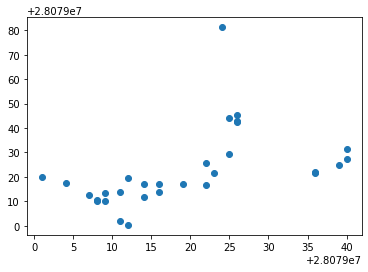

In [14]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [15]:
print(lr.score(x_test,y_test))

-0.7951791369029819


In [16]:
lr.score(x_train,y_train)

0.7194797364508576

# LASSO REGRESSION

In [17]:
from sklearn.linear_model import Ridge,Lasso

In [18]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [19]:
la.score(x_test,y_test)

0.10628038468889789

# RIDGE REGRESSION

In [20]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [21]:
rr.score(x_test,y_test)

-0.2761763591385318

# LOGISTIC REGRESSION

In [150]:
w=d.iloc[:,0:14]
w1=d.iloc[:,-1]

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
b=StandardScaler().fit_transform(w)


In [153]:
from sklearn.model_selection import train_test_split
w_train,w_test,w1_train,w1_test=train_test_split(w,w1,test_size=0.7)

In [154]:
p=LogisticRegression(max_iter=10000)
p.fit(b,w1)

LogisticRegression(max_iter=10000)

In [155]:
t=[[12,22,32,42,52,45,32,56,87,34,69,76,45,90]]


In [156]:
e=p.predict(t)
print(e)

[28079001]


In [157]:
p.classes_

array([28079001, 28079003, 28079004, 28079006, 28079007, 28079008,
       28079009, 28079011, 28079012, 28079014, 28079015, 28079016,
       28079018, 28079019, 28079021, 28079022, 28079023, 28079024,
       28079025, 28079026, 28079027, 28079036, 28079038, 28079039,
       28079040, 28079099], dtype=int64)

In [158]:
print(p.score(w_test,w1_test))

0.04285714285714286


In [159]:
p.predict_proba(t)[0][0]

1.0

In [160]:
p.predict_proba(t)[0][1]

1.1933640143598274e-61

# ELASTIC NET

In [161]:
from sklearn.linear_model import ElasticNet 
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [162]:
print(p.coef_)

[-1.07689728 -0.26139389 -0.49321852 -5.0457268   0.3322135   0.45401638
 -0.34003721]


In [163]:
print(p.intercept_)

28079046.89998091


In [164]:
print(p.predict(x_test))

[28079026.12834152 28079020.77681855 28079017.029429   28079023.29305729
 28079024.82006209 28079014.51565367 28079021.30649686 28079019.62183949
 28079027.91474642 28079022.74381512 28079025.57800901 28079003.64376096
 28079031.96395139 28079028.22381434 28079022.11997468 28079046.36288461
 28079014.3500879  28079024.90128104 28079025.05663362 28079046.25427302
 28079010.03796719 28079009.6862478  28079022.47849876 28079009.31334075
 28079023.37863842 28079017.41325714 28079016.95228939 28079023.53857995
 28079020.05220233 28079019.29705217]


In [165]:
print(p.score(x_test,y_test))

-0.37760943662227775


# RANDOM FOREST

In [166]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [167]:
parameters={'max_depth':[1,53,67,53,57],
  'min_samples_leaf':[5,34,67,87,45],
           'n_estimators':[23,45,67,23,56]}

In [168]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 53, 67, 53, 57],
                         'min_samples_leaf': [5, 34, 67, 87, 45],
                         'n_estimators': [23, 45, 67, 23, 56]},
             scoring='accuracy')

In [169]:
grid_search.best_score_

0.24285714285714285

In [170]:
rfc_best=grid_search.best_estimator_

[Text(1014.5454545454545, 2441.67, 'X[0] <= 1.075\ngini = 0.942\nsamples = 44\nvalue = [1, 4, 1, 4, 0, 1, 4, 2, 0, 3, 5, 1, 4, 0\n4, 3, 6, 2, 4, 1, 0, 3, 1, 6, 5, 5]'),
 Text(507.27272727272725, 1997.73, 'X[3] <= 3.065\ngini = 0.702\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 6, 2, 0, 1, 0, 0, 0, 0, 0, 5]'),
 Text(253.63636363636363, 1553.79, 'gini = 0.408\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 5]'),
 Text(760.9090909090909, 1553.79, 'gini = 0.406\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0]'),
 Text(1521.8181818181818, 1997.73, 'X[4] <= 2.12\ngini = 0.928\nsamples = 34\nvalue = [1, 4, 1, 4, 0, 0, 4, 2, 0, 3, 5, 1, 4, 0\n4, 3, 0, 0, 4, 0, 0, 3, 1, 6, 5, 0]'),
 Text(1268.181818181818, 1553.79, 'gini = 0.628\nsamples = 6\nvalue = [0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(1775.4545454545455, 1553.79, 'X

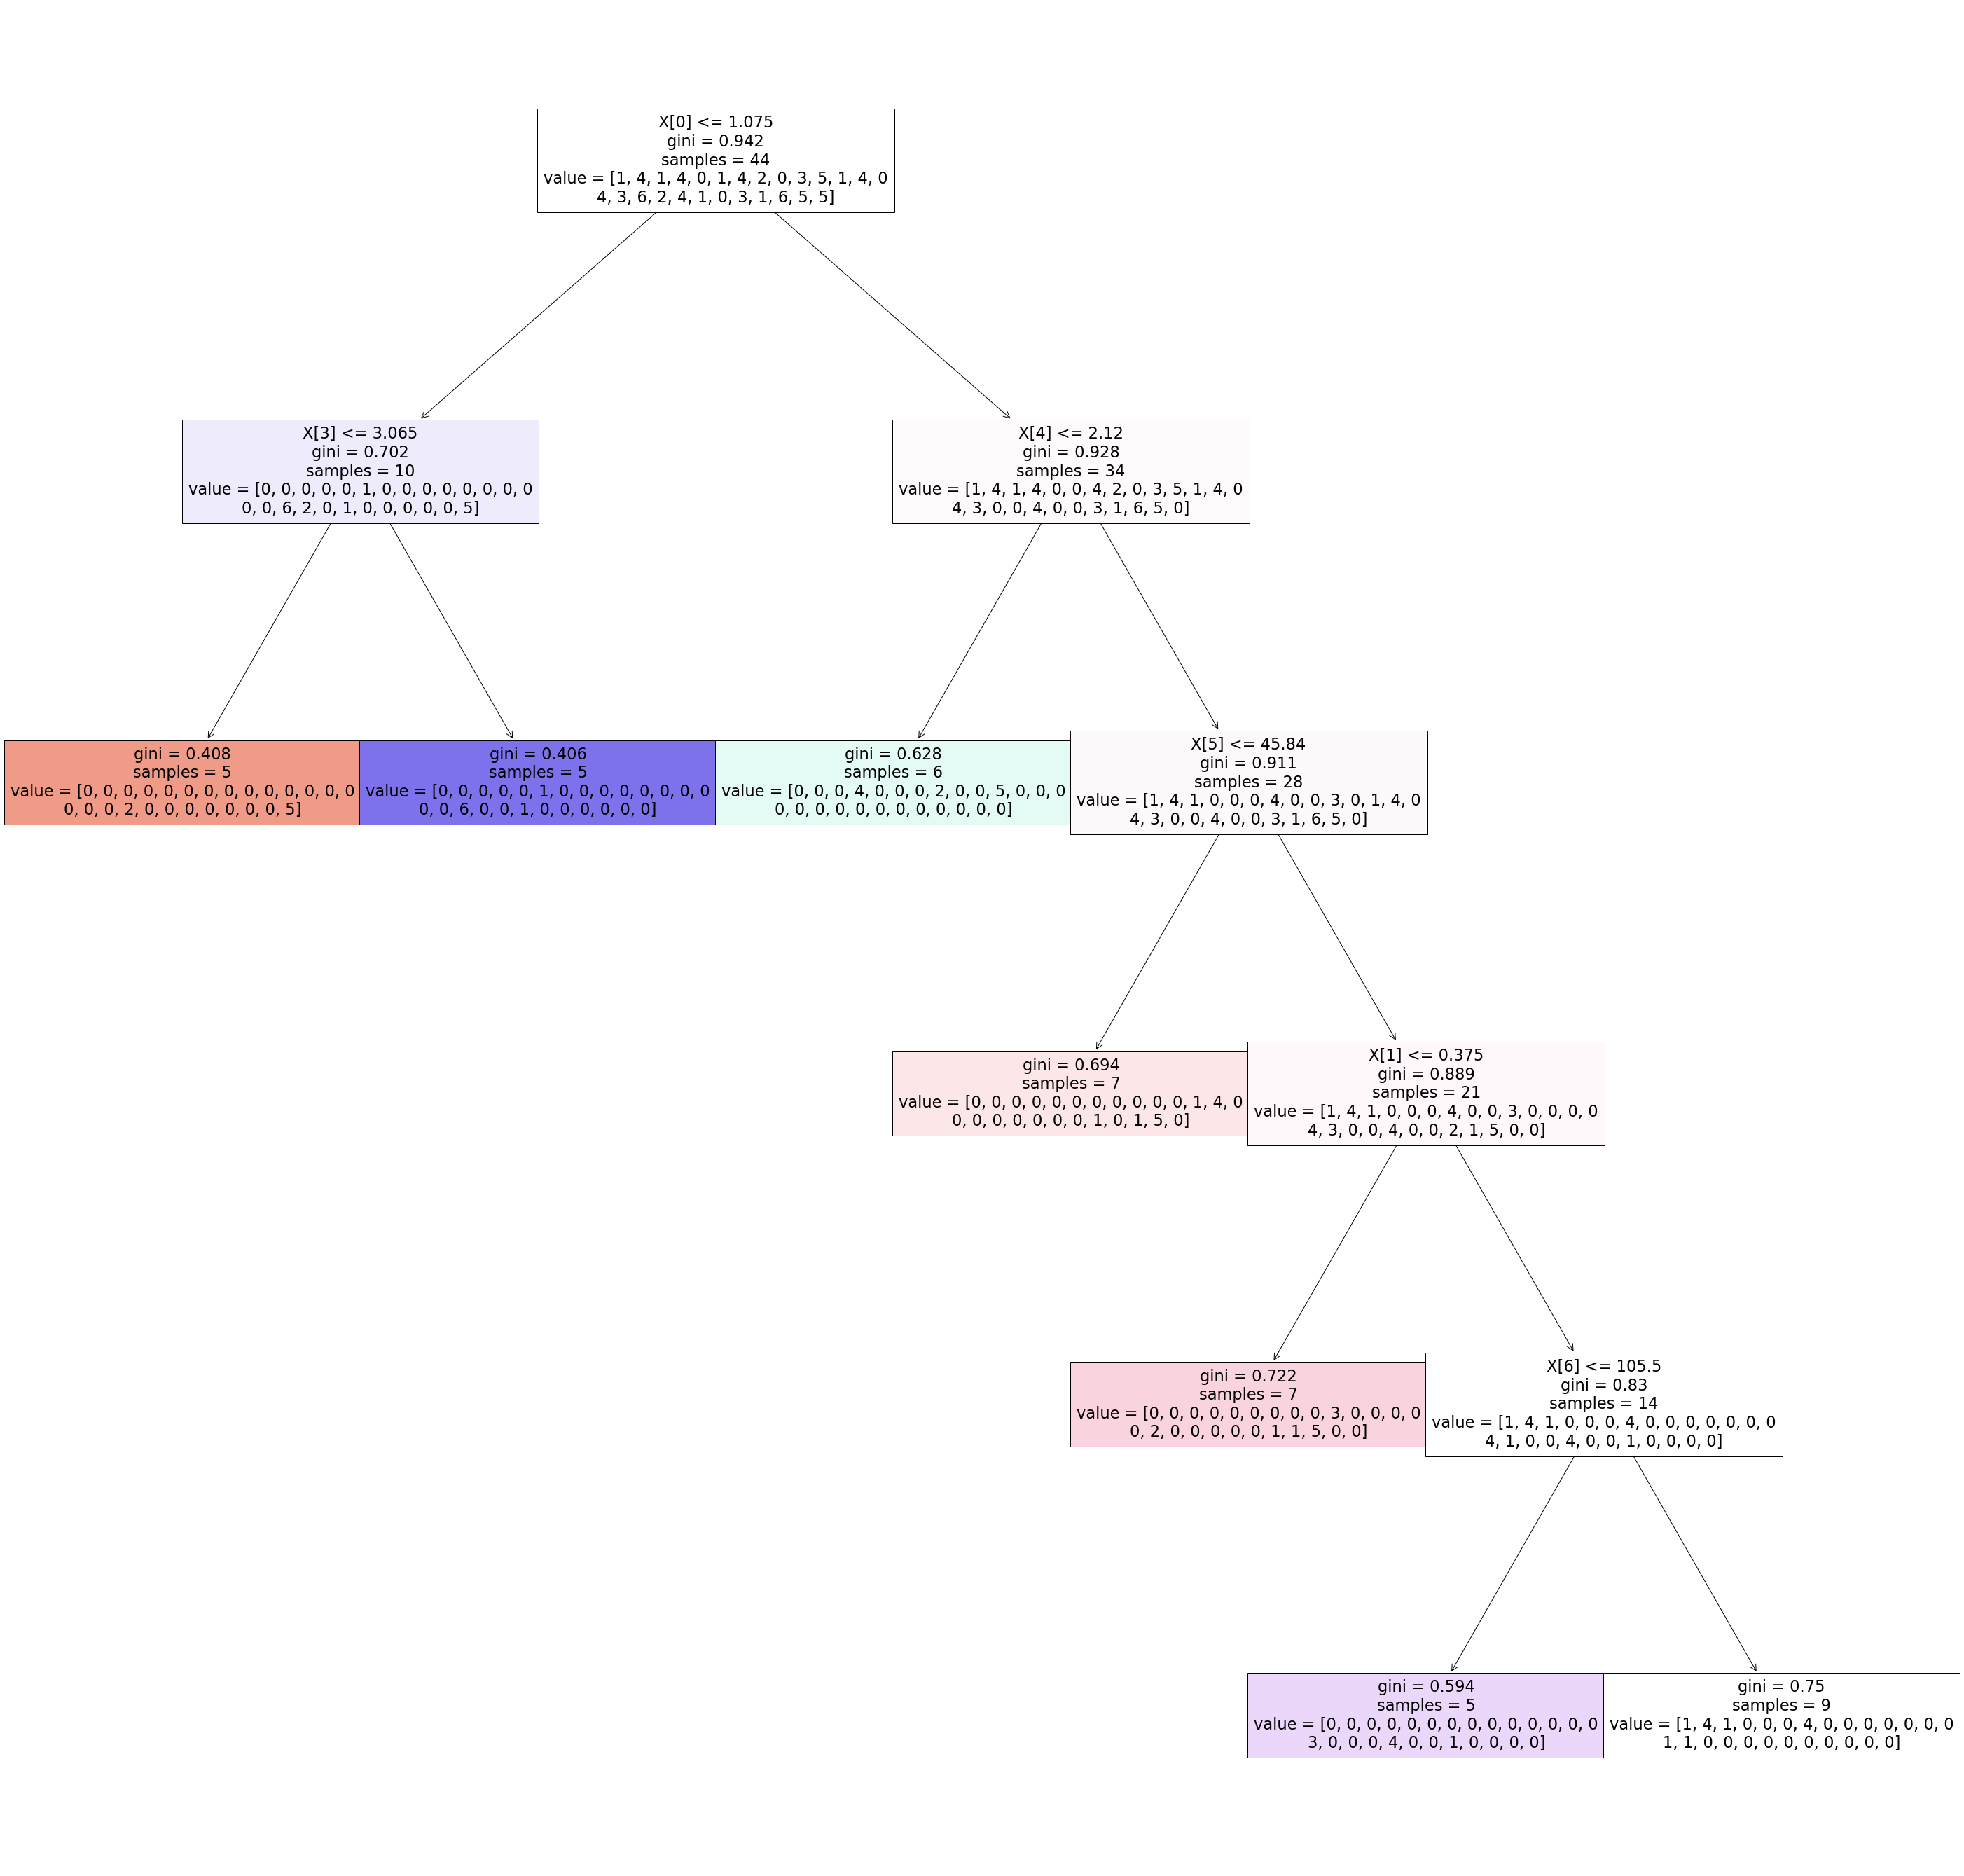

In [171]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:Random Forest score=0.24285714285714285 is a Highest accuracy

# DATA SET 8

In [44]:
s=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2008.csv")
s

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,NaN,0.47,NaN,NaN,NaN,83.089996,120.699997,NaN,16.990000,16.889999,10.40,NaN,8.98,NaN,NaN,28079001
1,2008-06-01 01:00:00,NaN,0.59,NaN,NaN,NaN,94.820000,130.399994,NaN,17.469999,19.040001,NaN,NaN,5.85,NaN,NaN,28079003
2,2008-06-01 01:00:00,NaN,0.55,NaN,NaN,NaN,75.919998,104.599998,NaN,13.470000,20.270000,NaN,NaN,6.95,NaN,NaN,28079004
3,2008-06-01 01:00:00,NaN,0.36,NaN,NaN,NaN,61.029999,66.559998,NaN,23.110001,10.850000,NaN,NaN,5.96,NaN,NaN,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.70,3.01,0.30,105.199997,214.899994,1.61,12.120000,37.160000,21.90,1.43,10.92,1.53,6.67,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226387,2008-11-01 00:00:00,0.48,0.30,0.57,1.00,0.31,13.050000,14.160000,0.91,57.400002,5.450000,5.15,1.86,9.68,1.23,2.05,28079024
226388,2008-11-01 00:00:00,NaN,0.30,NaN,NaN,NaN,41.880001,48.500000,NaN,35.830002,15.020000,NaN,NaN,8.90,NaN,NaN,28079025
226389,2008-11-01 00:00:00,0.25,NaN,0.56,NaN,0.11,83.610001,102.199997,NaN,14.130000,17.540001,13.91,NaN,7.00,1.56,0.60,28079026
226390,2008-11-01 00:00:00,0.54,NaN,2.70,NaN,0.18,70.639999,81.860001,NaN,NaN,11.910000,NaN,NaN,8.02,1.57,2.97,28079027


In [45]:
s1=s.fillna(value=4)
s1

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,4.00,0.47,4.00,4.00,4.00,83.089996,120.699997,4.00,16.990000,16.889999,10.40,4.00,8.98,4.00,4.00,28079001
1,2008-06-01 01:00:00,4.00,0.59,4.00,4.00,4.00,94.820000,130.399994,4.00,17.469999,19.040001,4.00,4.00,5.85,4.00,4.00,28079003
2,2008-06-01 01:00:00,4.00,0.55,4.00,4.00,4.00,75.919998,104.599998,4.00,13.470000,20.270000,4.00,4.00,6.95,4.00,4.00,28079004
3,2008-06-01 01:00:00,4.00,0.36,4.00,4.00,4.00,61.029999,66.559998,4.00,23.110001,10.850000,4.00,4.00,5.96,4.00,4.00,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.70,3.01,0.30,105.199997,214.899994,1.61,12.120000,37.160000,21.90,1.43,10.92,1.53,6.67,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226387,2008-11-01 00:00:00,0.48,0.30,0.57,1.00,0.31,13.050000,14.160000,0.91,57.400002,5.450000,5.15,1.86,9.68,1.23,2.05,28079024
226388,2008-11-01 00:00:00,4.00,0.30,4.00,4.00,4.00,41.880001,48.500000,4.00,35.830002,15.020000,4.00,4.00,8.90,4.00,4.00,28079025
226389,2008-11-01 00:00:00,0.25,4.00,0.56,4.00,0.11,83.610001,102.199997,4.00,14.130000,17.540001,13.91,4.00,7.00,1.56,0.60,28079026
226390,2008-11-01 00:00:00,0.54,4.00,2.70,4.00,0.18,70.639999,81.860001,4.00,4.000000,11.910000,4.00,4.00,8.02,1.57,2.97,28079027


In [46]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226392 entries, 0 to 226391
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     226392 non-null  object 
 1   BEN      226392 non-null  float64
 2   CO       226392 non-null  float64
 3   EBE      226392 non-null  float64
 4   MXY      226392 non-null  float64
 5   NMHC     226392 non-null  float64
 6   NO_2     226392 non-null  float64
 7   NOx      226392 non-null  float64
 8   OXY      226392 non-null  float64
 9   O_3      226392 non-null  float64
 10  PM10     226392 non-null  float64
 11  PM25     226392 non-null  float64
 12  PXY      226392 non-null  float64
 13  SO_2     226392 non-null  float64
 14  TCH      226392 non-null  float64
 15  TOL      226392 non-null  float64
 16  station  226392 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 29.4+ MB


In [47]:
s2=s1.head(100)
s2

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,4.00,0.47,4.00,4.00,4.00,83.089996,120.699997,4.00,16.990000,16.889999,10.40,4.00,8.98,4.00,4.00,28079001
1,2008-06-01 01:00:00,4.00,0.59,4.00,4.00,4.00,94.820000,130.399994,4.00,17.469999,19.040001,4.00,4.00,5.85,4.00,4.00,28079003
2,2008-06-01 01:00:00,4.00,0.55,4.00,4.00,4.00,75.919998,104.599998,4.00,13.470000,20.270000,4.00,4.00,6.95,4.00,4.00,28079004
3,2008-06-01 01:00:00,4.00,0.36,4.00,4.00,4.00,61.029999,66.559998,4.00,23.110001,10.850000,4.00,4.00,5.96,4.00,4.00,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.70,3.01,0.30,105.199997,214.899994,1.61,12.120000,37.160000,21.90,1.43,10.92,1.53,6.67,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2008-06-01 04:00:00,4.00,0.25,4.00,4.00,4.00,40.990002,47.419998,4.00,26.110001,7.830000,4.00,4.00,8.41,4.00,4.00,28079036
96,2008-06-01 04:00:00,4.00,0.51,4.00,4.00,4.00,74.889999,112.400002,4.00,6.850000,10.840000,4.00,4.00,8.02,4.00,4.00,28079021
97,2008-06-01 04:00:00,4.00,0.23,4.00,4.00,4.00,75.099998,101.300003,4.00,9.420000,19.549999,11.16,4.00,5.47,4.00,4.00,28079022
98,2008-06-01 04:00:00,0.38,0.26,0.41,4.00,0.19,54.560001,66.410004,4.00,16.190001,10.630000,4.00,4.00,4.99,1.32,2.26,28079023


In [48]:
#linear
x=s2.iloc[:,1:8]
y=s2.iloc[:,-1]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
print(lr.intercept_)

28079065.89966231


In [52]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-35.240581
CO,-3.868574
EBE,35.735885
MXY,-12.981259
NMHC,1.391059
NO_2,0.506811
NOx,-0.357798


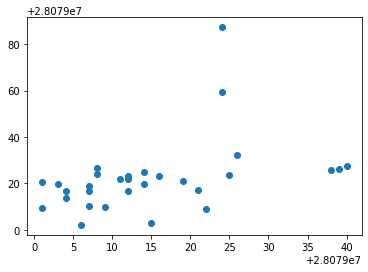

In [53]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [54]:
print(lr.score(x_test,y_test))

-1.4780870725928046


In [55]:
lr.score(x_train,y_train)

0.32277364986334356

In [56]:
#lasso
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [57]:
la.score(x_test,y_test)

-0.31348932911403704

In [58]:
#ridge
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [59]:
rr.score(x_test,y_test)

-0.5840424727602023

In [60]:
#logistic
b=StandardScaler().fit_transform(x)


In [61]:
p=LogisticRegression(max_iter=10000)
p.fit(x,y)

LogisticRegression(max_iter=10000)

In [62]:
t=[[12,22,32,42,52,45,32]]

In [63]:
e=p.predict(t)
print(e)

[28079039]


In [64]:
p.classes_

array([28079001, 28079003, 28079004, 28079006, 28079007, 28079008,
       28079009, 28079011, 28079012, 28079014, 28079015, 28079016,
       28079018, 28079019, 28079021, 28079022, 28079023, 28079024,
       28079025, 28079026, 28079027, 28079036, 28079038, 28079039,
       28079040, 28079099], dtype=int64)

In [65]:
print(p.score(x_test,y_test))

0.5333333333333333


In [66]:
p.predict_proba(t)[0][0]

9.408868692559672e-15

In [67]:
p.predict_proba(t)[0][1]

2.0893135582423165e-10

In [68]:
#elastic
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [69]:
print(p.coef_)

[-1.07689728 -0.26139389 -0.49321852 -5.0457268   0.3322135   0.45401638
 -0.34003721]


In [70]:
print(p.intercept_)

28079046.89998091


In [71]:
print(p.predict(x_test))

[28079026.12834152 28079020.77681855 28079017.029429   28079023.29305729
 28079024.82006209 28079014.51565367 28079021.30649686 28079019.62183949
 28079027.91474642 28079022.74381512 28079025.57800901 28079003.64376096
 28079031.96395139 28079028.22381434 28079022.11997468 28079046.36288461
 28079014.3500879  28079024.90128104 28079025.05663362 28079046.25427302
 28079010.03796719 28079009.6862478  28079022.47849876 28079009.31334075
 28079023.37863842 28079017.41325714 28079016.95228939 28079023.53857995
 28079020.05220233 28079019.29705217]


In [72]:
print(p.score(x_test,y_test))

-0.37760943662227775


In [73]:
#randomforest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
parameters={'max_depth':[1,53,75,3,57],
  'min_samples_leaf':[5,34,6,87,45],
           'n_estimators':[3,53,7,23,56]}

In [75]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 53, 75, 3, 57],
                         'min_samples_leaf': [5, 34, 6, 87, 45],
                         'n_estimators': [3, 53, 7, 23, 56]},
             scoring='accuracy')

In [76]:
grid_search.best_score_

0.2571428571428571

In [77]:
rfc_best=grid_search.best_estimator_

[Text(930.0, 2397.276, 'X[0] <= 1.455\ngini = 0.941\nsamples = 47\nvalue = [0, 1, 0, 1, 1, 1, 6, 2, 1, 2, 3, 6, 6, 6\n3, 3, 1, 2, 1, 1, 3, 5, 3, 5, 2, 5]'),
 Text(620.0, 1864.548, 'gini = 0.757\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 1, 2, 0, 1, 3, 0, 0, 0, 0, 5]'),
 Text(1240.0, 1864.548, 'X[5] <= 48.045\ngini = 0.924\nsamples = 37\nvalue = [0, 1, 0, 1, 1, 0, 6, 2, 1, 2, 3, 6, 6, 6\n3, 3, 0, 0, 1, 0, 0, 5, 3, 5, 2, 0]'),
 Text(620.0, 1331.82, 'X[6] <= 46.84\ngini = 0.785\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 6, 6, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 2, 0]'),
 Text(310.0, 799.0920000000001, 'gini = 0.675\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 3, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0]'),
 Text(930.0, 799.0920000000001, 'gini = 0.75\nsamples = 7\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0]'),
 Text(1860.0, 1331.82, 'X[1] <= 0.355\ngini = 0.897\nsamples = 24\nvalue = [0, 1, 0, 1,

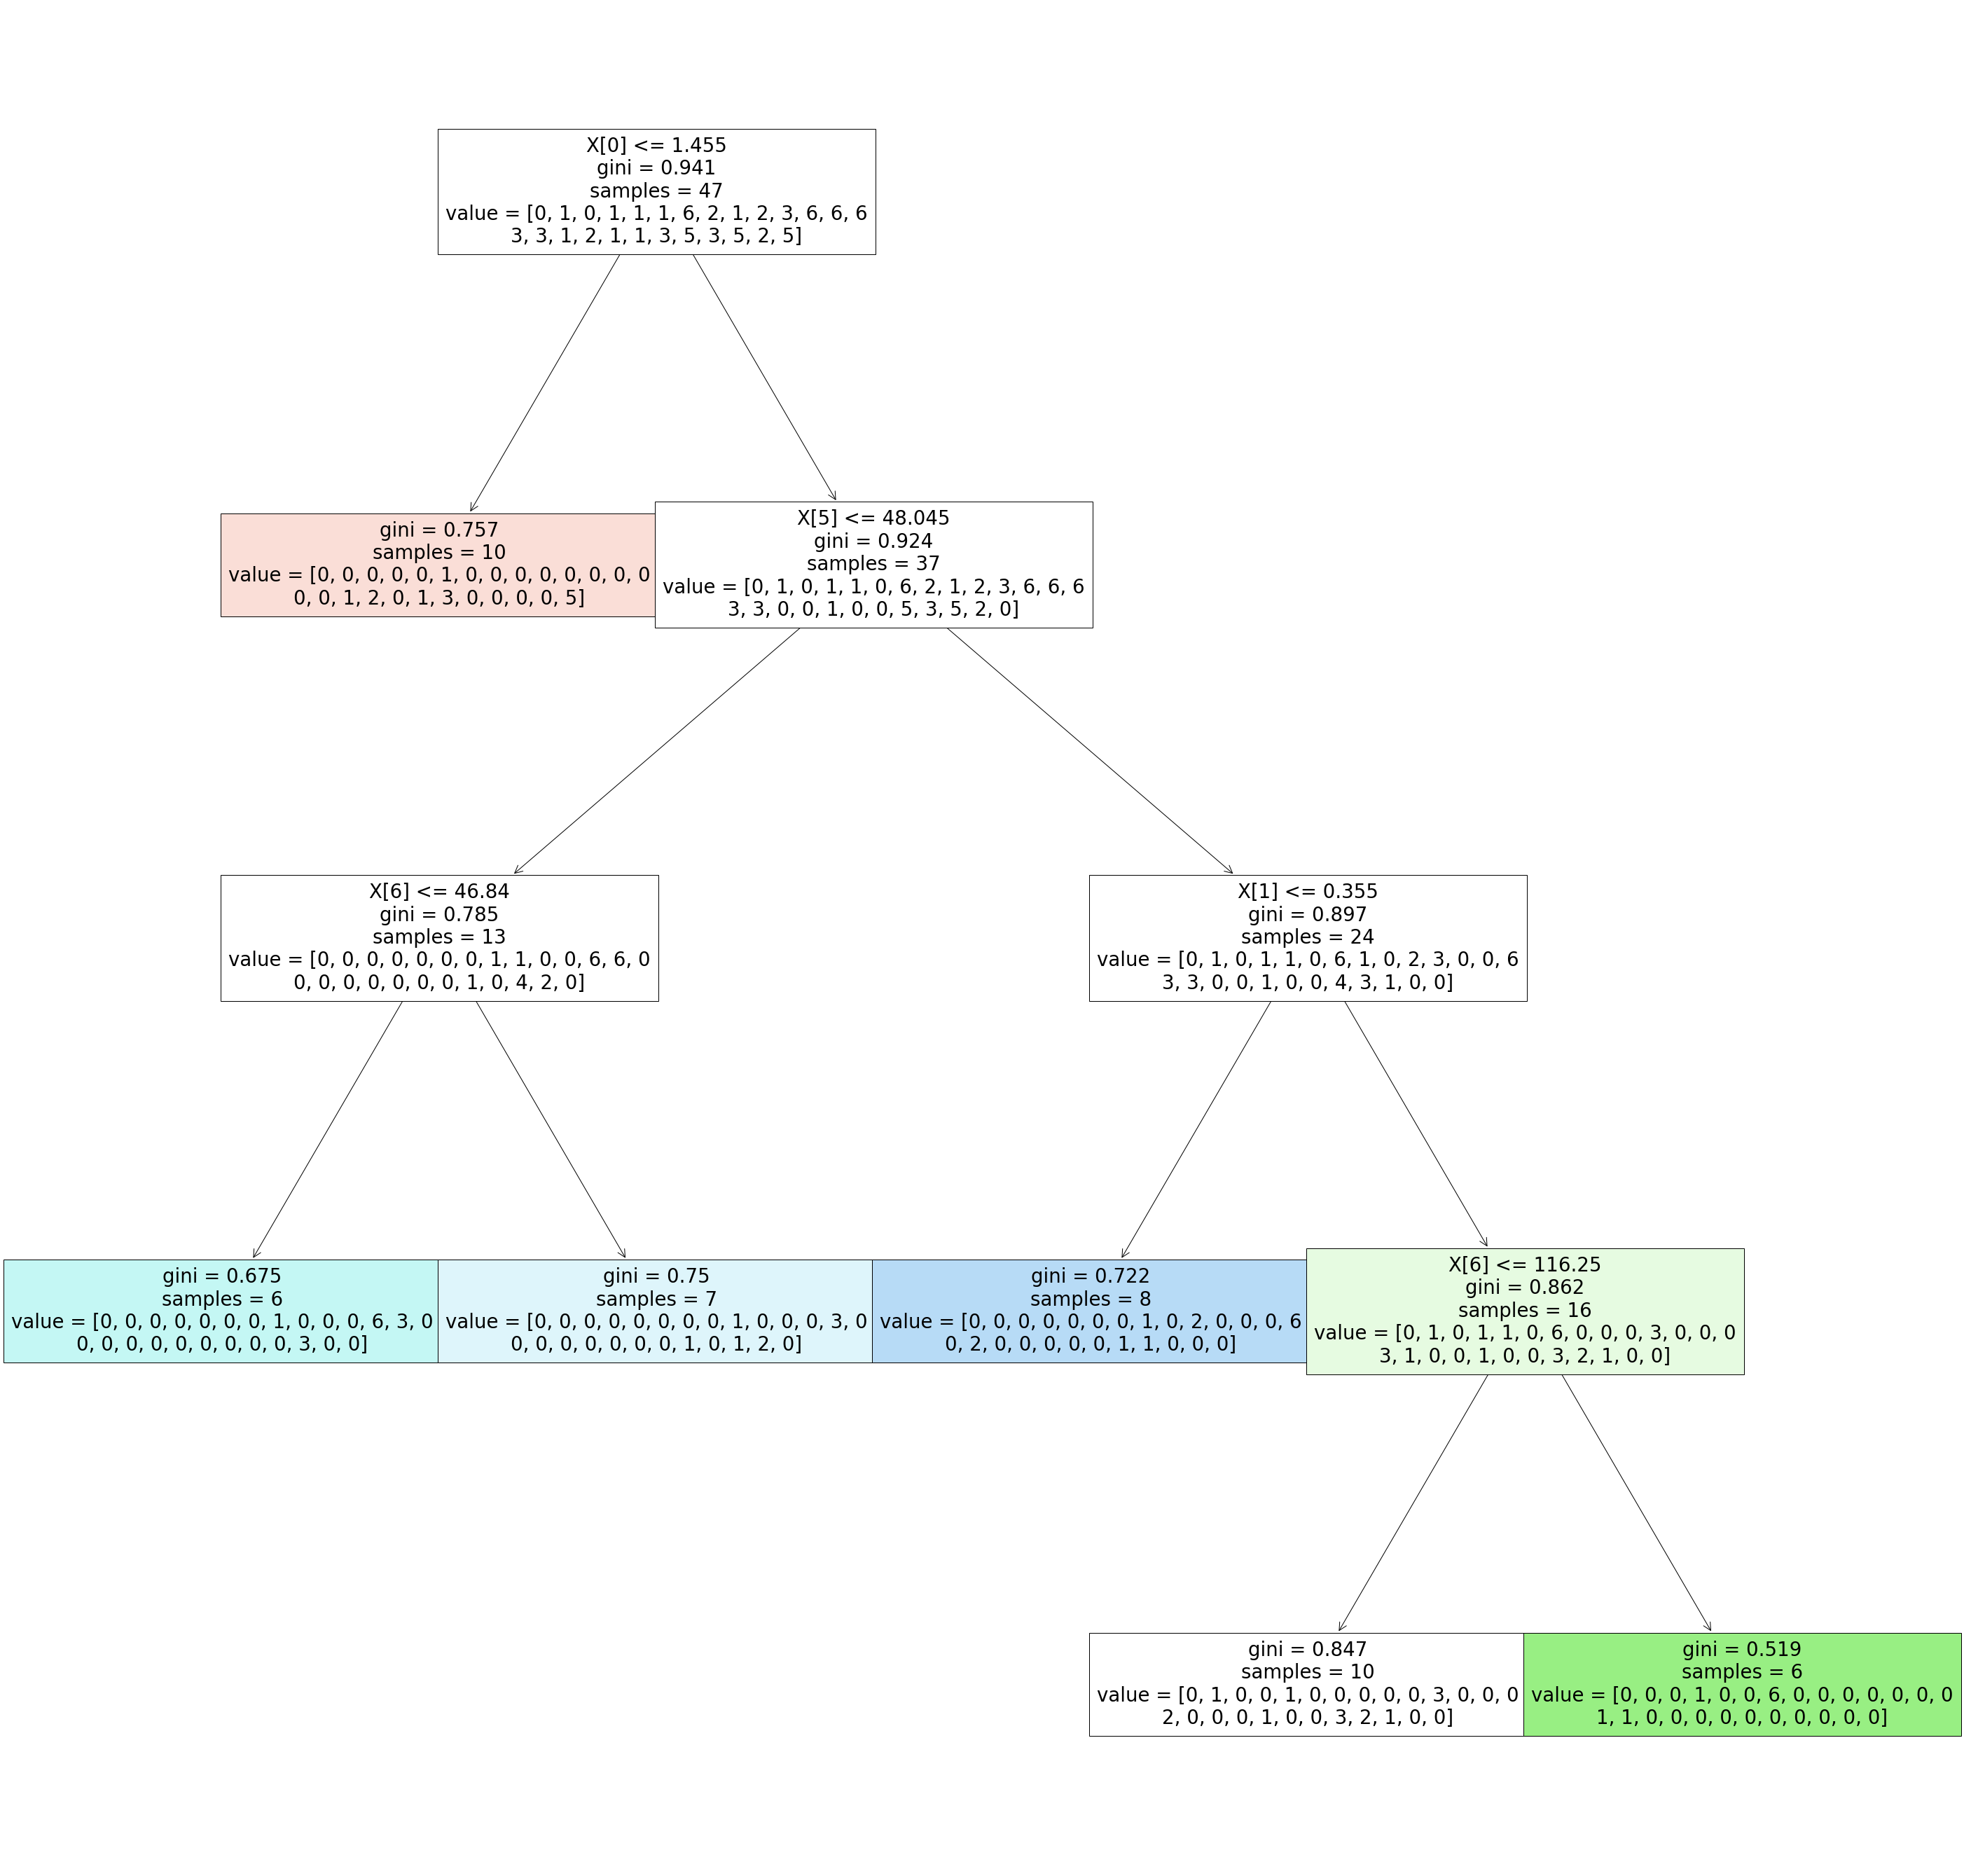

In [78]:
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:LOGISTIC SCORE=0.5333333333333333 is a Highest accuracy